<a href="https://colab.research.google.com/github/BryanBYChoi/Reinforcement_Learning_IFRS16_Lease/blob/master/IFRS_16_Lease_Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

64 24

Training agent...



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[episode 1/200] eps = 0.270 ==> iter = 5502, rew = 715645.7
64 24


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

[episode 2/200] eps = 0.243 ==> iter = 5502, rew = 976595.7
64 24
[episode 3/200] eps = 0.219 ==> iter = 5502, rew = 359810.6
64 24
[episode 4/200] eps = 0.197 ==> iter = 5502, rew = 1272596.3
64 24
[episode 5/200] eps = 0.177 ==> iter = 5502, rew = 350094.5
64 24
[episode 6/200] eps = 0.159 ==> iter = 5502, rew = 347732.7
64 24
[episode 7/200] eps = 0.143 ==> iter = 5502, rew = 350094.5
64 24
[episode 8/200] eps = 0.129 ==> iter = 5502, rew = 1515096.8
64 24
[episode 9/200] eps = 0.116 ==> iter = 5502, rew = 1198596.2
64 24
[episode 10/200] eps = 0.105 ==> iter = 5502, rew = 1411596.6
64 24
[episode 11/200] eps = 0.094 ==> iter = 5502, rew = 350094.5
64 24
[episode 12/200] eps = 0.085 ==> iter = 5502, rew = 350094.5
64 24
[episode 13/200] eps = 0.076 ==> iter = 5502, rew = 350094.5
64 24
[episode 14/200] eps = 0.069 ==> iter = 5502, rew = 350094.5
64 24
[episode 15/200] eps = 0.062 ==> iter = 5502, rew = 350094.5
64 24
[episode 16/200] eps = 0.056 ==> iter = 5502, rew = 350094.5
64 24

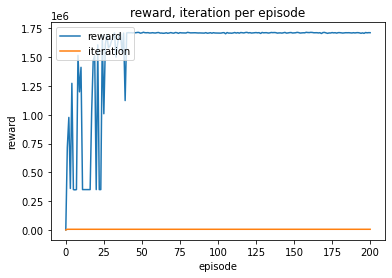

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
"""
Using Gridworld as joystick for the IFRS 16 Lease accounting
"""
import os, sys, random, operator
import numpy as np
import pandas as pd
from time import localtime, strftime

#2
factors = [0.9, 0.9, 0.9, 500, -0.001, -10, 1000, 300, 200, 0.3,10000, -100]
# 0Epsilon decay, 1Learning Rate, Reward discount, 3Ending reward(좌측 왼쪽), 4움직임, 선넘기, 6regular리워드, 7CV할인금액, 8에피소드, 9시작epsilon, 10extra리워드, 11iter과중시

CurPeriod = 3  #글로벌변수. 한분기 어치를 할 것이기 때문에 3개월만

k = {'Jdate': [20200228, 20200228, 20200228, 20200131, 20200131, 20200131, 20200131, 20200131, 20200131, 20200131, 20200131, 20200131, 20200131, 20200131, 20200228, 20200228, 20200228, 20200228, 20200228, 20200228, 20200228, 20200228, 20200228, 20200228, 20200228, 20200331, 20200331, 20200131, 20200331, 20200331, 20200131, 20200131, 20200131, 20200331, 20200331, 20200331, 20200331, 20200331, 20200331, 20200331, 20200131, 20200228, 20200401, 20200228, 20200228, 20200331, 20200331, 20200131, 20200131, 20200131, 20200131, 20200131, 20200131, 20200131, 20200131, 20200131, 20200228, 20200228, 20200228, 20200228, 20200331, 20200331, 20200331, 20200331, 20200331, 20200331, 20200331, 20200331, 20200331, 20200331, 20200131, 20200131, 20200131, 20200131, 20200131, 20200131, 20200228, 20200228, 20200228, 20200228, 20200228, 20200228, 20200228, 20200331, 20200331, 20200331, 20200331, 20200331], 'Jnumber': [8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531, 8531], 'Jrow': [77, 77, 77, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 86, 85, 86, 82, 87, 88, 85, 86, 87, 89, 90, 92, 93, 94, 95, 96, 43, 55, 68, 84, 85, 91, 97, 41, 42, 44, 45, 46, 47, 48, 49, 50, 54, 56, 57, 58, 66, 67, 69, 70, 71, 72, 73, 74, 75, 76, 107, 108, 109, 110, 111, 112, 103, 104, 105, 106, 107, 108, 109, 114, 115, 116, 117, 118], 'Deptcode': ['C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201', 'C050201'], 'Deptname': ['17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사', '17-해병-00시설공사'], 'Corpnumber': [0, 0, 0, 0, 0, 1428108057, 1428108057, 0, 0, 0, 0, 0, 5061377889, 2808700683, 0, 1428108057, 1428108057, 0, 0, 0, 0, 0, 0, 2808700683, 5061377889, 0, 1428108057, 6172748342, 1428108057, 0, 5062975811, 5062975811, 5150671300, 0, 0, 5061377889, 2808700683, 0, 0, 0, 1138132864, 1138132864, 1138132864, 6172748342, 5150671300, 5150671300, 6172748342, 5062069918, 0, 4938200023, 4938200023, 4938200023, 4938200023, 4938200023, 4938200023, 4938200023, 5062069918, 4938200023, 4938200023, 4938200023, 0, 4938200023, 4938200023, 5062069918, 4938200023, 4938200023, 4938200023, 4938200023, 4938200023, 0, 5068200896, 5069016374, 5048165391, 0, 0, 5684700118, 1078205791, 1078205791, 1078205791, 1148143082, 5048165391, 5060906941, 1148143082, 1148143082, 3938100857, 3938100857, 3938100857, 0], 'Corpname': ['조인숙', '조인숙', '조인숙3', '최순자', '조인숙', 'AJ캐피탈파트너스', 'AJ캐피탈파트너스', '김순래', '김정숙', '정성희', '김영택', '김재용', '정수기마트', '공영측기(주)', '최순자', 'AJ캐피탈파트너스', 'AJ캐피탈파트너스', '조인숙3', '김순래', '김정숙', '정성희', '김재용', '김영택', '공영측기(주)', '정수기마트', '최순자', 'AJ캐피탈파트너스', '러브리전산', 'AJ캐피탈파트너스', '조인숙', '수정상사', '수정상사', '대경세륜기', '김정숙', '김순래2', '정수기마트', '공영측기(주)', '정성희', '김재용', '김영택', '에스케이렌터카 주식회사', '에스케이렌터카 주식회사', '에스케이렌터카 주식회사', '러브리전산', '대경세륜기', '대경세륜기', '러브리전산', '타이어프로 오천점', '대우주유소', '동해농협주유소', '동해농협주유소', '동해농협주유소', '동해농협주유소', '동해농협주유소', '동해농협주유소', '동해농협주유소', '타이어프로 오천점', '동해농협주유소', '동해농협주유소', '동해농협주유소', '(주)신제일종합정비', '동해농협주유소', '동해농협주유소', '타이어프로 오천점', '동해농협주유소', '동해농협주유소', '동해농협주유소', '동해농협주유소', '동해농협주유소', '한국타이어용덕대리점 외', '(재)포항성모병원', '제5위생사', '(주)신영씨엔에스', '농협', '농협', '이레환경', '(재)한국환경수도연구소', '(재)한국환경수도연구소', '(재)한국환경수도연구소 ', '(주)산업공해연구소', '(주)신영씨엔에스', '혜빈환경', '(주)산업공해연구소 ', '(주)산업공해연구소', '(주)유원산업', '(주)유원산업', '(주)유원산업', '농협'], 'Detailnote': ['숙소임대료', '숙소임대료', '숙소임대료', '숙소임대료', '숙소임대료', '차량임대료(포터0861)', '차량임대료(포터2841)', '숙소임대료(6건)', '숙소임대료', '숙소임대료', '숙소임대료', '숙소임대료', '정수기임대료', 'GPS임대료', '숙소임대료', '차량임대료(포터0861)', '차량임대료(포터2841)', '숙소임대료', '숙소임대료', '숙소임대료', '숙소임대료', '숙소임대료', '숙소임대료', 'GPS임대료', '정수기관리비용', '숙소임차료', '차량임대료(포터2841)', '프린트임대료', '차량임대료(포터0861)', '숙소임차료', '생수', '생수', '세륜기 임대료 외', '숙소임차료', '숙소임차료', '정수기임대료', 'GPS임대료', '숙소임대료', '숙소임대료', '숙소임대료', '차량임대료(스포티지3498)', '차량임대료(스포티지3498)', '차량임대료(스포티지3498)', '프린트임대료', '세륜기임대료', '세륜기임대료', '프린트임대료', '차량수리비(스포티지8764)', '세차(스포티지3498)', '차량유류대(포터2841)', '차량유류대(포터0861)', '차량유류대', '차량유류대', '차량유류대(스포티지3498)', '차량유류대(스포티지8764)', '차량유류대(스포티지5670)', '차량수리비(스포티지5670)', '차량유류대(93루2841)', '차량유류대(90머0861)', '차량유류대(44하3498,48부8764,26라5670)', '차량검사비(스포티지5670)', '차량유류대(포터0861)', '차량유류대(포터2841)', '타이어수리비(포터0861)', '차량유류대', '차량유류대', '차량유류대(스포티지3498)', '차량유류대(스포티지8764)', '차량유류대(스포티지5670)', '타이어수리비(스포티지3498)', '검진비', '정화조 청소', '안전컨설팅수수료', '송금수수료', '송금수수료', 'cctv 촬영 및 수밀시험', '검사료', '검사료', '콘크리트 벽돌 외', '폐기물측정료', '안전컨설팅 수수료', '수중펌프수리', '알곤가스 외', '수질측정료', '모터 교체작업비', '모터 교체작업비', '모터 교체작업비', '송금수수료'], 'acctcode': [120829, 120829, 120829, 120829, 120829, 120829, 120829, 120829, 120829, 120829, 120829, 120829, 120829, 120829, 120829, 120829, 120829, 120829, 120829, 120829, 120829, 120829, 120829, 120829, 120829, 120829, 120829, 120829, 120829, 120829, 120829, 120829, 120829, 120829, 120829, 120829, 120829, 120829, 120829, 120829, 120841, 120841, 120841, 120829, 120829, 120829, 120829, 120841, 120841, 120841, 120841, 120841, 120841, 120841, 120841, 120841, 120841, 120841, 120841, 120841, 120841, 120841, 120841, 120841, 120841, 120841, 120841, 120841, 120841, 120841, 120845, 120845, 120845, 120845, 120845, 120845, 120845, 120845, 120845, 120845, 120845, 120845, 120845, 120845, 120845, 120845, 120845, 120845], 'acctname': ['지급임차료', '지급임차료', '지급임차료', '지급임차료', '지급임차료', '지급임차료', '지급임차료', '지급임차료', '지급임차료', '지급임차료', '지급임차료', '지급임차료', '지급임차료', '지급임차료', '지급임차료', '지급임차료', '지급임차료', '지급임차료', '지급임차료', '지급임차료', '지급임차료', '지급임차료', '지급임차료', '지급임차료', '지급임차료', '지급임차료', '지급임차료', '지급임차료', '지급임차료', '지급임차료', '지급임차료', '지급임차료', '지급임차료', '지급임차료', '지급임차료', '지급임차료', '지급임차료', '지급임차료', '지급임차료', '지급임차료', '차량유지비', '차량유지비', '차량유지비', '지급임차료', '지급임차료', '지급임차료', '지급임차료', '차량유지비', '차량유지비', '차량유지비', '차량유지비', '차량유지비', '차량유지비', '차량유지비', '차량유지비', '차량유지비', '차량유지비', '차량유지비', '차량유지비', '차량유지비', '차량유지비', '차량유지비', '차량유지비', '차량유지비', '차량유지비', '차량유지비', '차량유지비', '차량유지비', '차량유지비', '차량유지비', '지급수수료', '지급수수료', '지급수수료', '지급수수료', '지급수수료', '지급수수료', '지급수수료', '지급수수료', '지급수수료', '지급수수료', '지급수수료', '지급수수료', '지급수수료', '지급수수료', '지급수수료', '지급수수료', '지급수수료', '지급수수료'], 'debit': [190000, 580000, 190000, 800000, 195000, 510000, 467200, 1200000, 200000, 200000, 400000, 600000, 85000, 550000, 790000, 500000, 467200, 600000, 1200000, 210000, 190000, 600000, 400000, 550000, 85000, 800000, 467200, 40909, 500000, 600000, 30000, 78000, 630000, 200000, 1200000, 85000, 550000, 200000, 600000, 400000, 598000, 598000, 598000, 40909, 500000, 500000, 40909, 515000, 5000, 247091, 198000, 489600, -489600, 163200, 163200, 163200, 324500, 195818, 195818, 554900, 45000, 43636, 87273, 220000, 244200, -244200, 100200, 96000, 48000, 30000, 429110, 473000, 900000, 112500, 14500, 7371595, 276000, 828000, 682800, 212300, 900000, 2800000, 699160, 151100, 1000000, 1000000, -1000000, 83000], 'credit': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

df1 = pd.DataFrame(k)


# 데이터 호출
#  df1 = pd.read_excel('Cashflow_related_specific.xlsx') 
df2 = df1
df2 = df2.fillna(0)
df2['Jyear'] = df2['Jdate'].astype(str).str[:4]
df2['Jmonth'] = df2['Jdate'].astype(str).str[5:6]
model_reward = 200000

# 필요한 추가정보 마킹
df2['strDeptcode'] = df2.Deptcode.astype(str)
df2['strCorpnumber'] = df2.Corpnumber.astype(str)
df2['strDebit'] = df2.debit.astype(str)
df2['count3'] = df2[['strDeptcode', 'strCorpnumber','Corpname','strDebit']].apply(lambda x: '_'.join(x), axis=1)
df2['count4'] = sum(map(lambda x : x == df2.count3, df2.count3))
df2['count5'] = 0
df2['count6'] = 0
acdf1 = [df2[df2.count4 != CurPeriod],df2[df2.count4 == CurPeriod]] #검사대상, 검사비대상

aindex = 0
plot1 = pd.DataFrame({'episode':0, 'epsilon':0,'iteration':0,'reward':0}, index =[aindex])

backup_a = acdf1.copy() # 복구용
print (len(acdf1[0]), len(acdf1[1]))

# Grid의 크기 설정

lstCorpname = acdf1[0].Corpname.drop_duplicates().tolist()
lstdebit = acdf1[0].debit.drop_duplicates().tolist()
orgdfsize = len(acdf1[0]) # X축으로. 점차 줄어든다.
orglstCorpnamesize = len(lstCorpname) # Y축으로 그대로 유지된다.

class Environment:
    
    def __init__(self, Ny, Nx):
        # Define state space
        self.Ny = Ny  # y grid size
        self.Nx = Nx  # x grid size
        self.state_dim = (Ny, Nx)
        # Define action space
        self.action_dim = (4,)  # up, right, down, left
        self.action_dict = {"up": 0, "right": 1, "down": 2, "left": 3}
        self.action_coords = [(-1, 0), (0, 1), (1, 0), (0, -1)]  # translations
        #self.dfc = Environment.dfchange
        #self.fnel = self.fnEvalease()
        #self.fnno = self.fn_nodebitEvalease()
        # Define rewards table
        #self.R = self._build_rewards()  # R(s,a) agent rewards
        # Check action space consistency
        if len(self.action_dict.keys()) != len(self.action_coords):
            exit("err: inconsistent actions given")

    def reset(self):
        # Reset agent state to top-left grid corner
        self.state = (0, 0)  
        return self.state

    def step(self, action):
        # Evolve agent state
        state_next = (self.state[0] + self.action_coords[action][0],
                      self.state[1] + self.action_coords[action][1])
        
        
        
        # Collect reward
        
        #r_nongoal = -0.1  # penalty for not reaching terminal state
        #self.R = r_nongoal * np.ones(self.state_dim + self.action_dim, dtype=float)  # R[s,a]
        #self.R[1, 1, self.action_dict["down"]] = Environment.dfchange(acdf1, state_next[0],state_next[1])  # arrive from above
        #self.R[2, 2, self.action_dict["right"]] = Environment.dfchange(acdf1, state_next[0],state_next[1])  # arrive from the left
        
        if state_next == (orglstCorpnamesize - 1,1):
            reward = factors[3]
        else:
            reward = Environment.dfchange(acdf1, state_next[0],state_next[1])
        
        
        #print ("--->",state_next[0])
        # Terminate if we reach bottom-right grid corner
            #원구문: done = (state_next[0] == self.Ny - 1) and (state_next[1] == self.Nx - 1)
        done = (reward > model_reward) or (iter_episode > 5500)
        # Update state
        self.state = state_next
        return state_next, reward, done
    
    def allowed_actions(self):
        # Generate list of actions allowed depending on agent grid location
        actions_allowed = []
        y, x = self.state[0], self.state[1]
        if (y > 0):  # no passing top-boundary
            actions_allowed.append(self.action_dict["up"])
        if (y < self.Ny - 1):  # no passing bottom-boundary
            actions_allowed.append(self.action_dict["down"])
        if (x > 0):  # no passing left-boundary
            actions_allowed.append(self.action_dict["left"])
        if (x < self.Nx - 1):  # no passing right-boundary
            actions_allowed.append(self.action_dict["right"])
        actions_allowed = np.array(actions_allowed, dtype=int)
        return actions_allowed
    
    # 리스 유관성 평가 함수

    def fnEvalease(self):
        sdf1 = self.groupby(['Deptcode','Deptname','Corpnumber','Corpname','debit']).count()
        sdf2 = sdf1[sdf1.Jmonth == CurPeriod]
        EvaLease = len(sdf2)
        return EvaLease

    def fn_nodebitEvalease(self):
        sdf3 = self.groupby(['Deptcode','Deptname','Corpnumber','Corpname']).count()
        sdf4 = sdf3[sdf3.Jmonth >= CurPeriod]
        nodebitEvaLease = len(sdf4)
        return nodebitEvaLease
    
    def dfchange(self, Dy, Dx):    # Y회사이름,  X 바꿀 위치
        
        #  print(".", end='', flush = True)  진행사항 표시용
        
        orgEvalease = Environment.fnEvalease(self[0])
        org_ndEvalease = Environment.fn_nodebitEvalease(self[0])
        
        if Dx < len(self[0]):
            orgCorpname = self[0].iat[Dx,6]
            self[0].iat[Dx,6] = lstCorpname[Dy] #이름바꾸기
            rrwd = factors[4] #기본적으로 -0.1
        else:
            rrwd = factors[5] # 존재하지 않는 자료를 엑세스 하려 할때 (이미 줄어들어서 없어졌다.)
            return rrwd
    
    
        if Environment.fnEvalease(self[0]) > orgEvalease:
        #리스에 해당되는 전표를 재분류 해줌 (이름,금액기준)
            self[0]['count3'] = 0
            self[0]['count3'] = self[0][['strDeptcode', 'strCorpnumber','Corpname','strDebit']].apply(lambda x: '_'.join(x), axis=1)
            self[0]['count4'] = sum(map(lambda x : x == self[0].count3, self[0].count3))
        
            dfpmt = self[0][self[0].count4 == CurPeriod]
            self[1] = self[1].append(dfpmt)
        
            dfpmt2 = self[0][self[0].count4 != CurPeriod]
            self[0] = dfpmt2
        
            rrwd = factors[6]  #여기서는 rrwd가 1000000에 고정됨 (논리적으로)
   
        elif Environment.fn_nodebitEvalease(self[0]) > org_ndEvalease:
    
            self[0]['count5'] = self[0][['strDeptcode', 'strCorpnumber','Corpname']].apply(lambda x: '_'.join(x), axis=1)
            self[0]['count6'] = sum(map(lambda x : x == self[0].count5, self[0].count5))
    
            dfpmt = self[0][self[0].count6 == CurPeriod]
            lstPmt = dfpmt.debit.tolist()
            k1 = np.std(lstPmt)/np.average(lstPmt)
            if k1 < 1:   #금액이 표준편차/평균 대비 1이하로 적은 오차만 받아줌. 
                rrwd = factors[10] - k1*factors[7]   #오차만큼 리워드 감소
                self[1] = self[1].append(dfpmt)
                dfpmt2 = self[0][self[0].count6 != CurPeriod]
                self[0] = dfpmt2
        
        else:
            self[0].iat[Dx,6] = orgCorpname
    
        return rrwd
    
    
#    def _build_rewards(self):
#        # Define agent rewards R[s,a]
#        r_goal = 100  # reward for arriving at terminal state (bottom-right corner)
#        r_nongoal = -0.1  # penalty for not reaching terminal state
#        R = r_nongoal * np.ones(self.state_dim + self.action_dim, dtype=float)  # R[s,a]
#        R[state_next[0] - 2, state_next[1] - 1, self.action_dict["down"]] = Environment.dfchange(acdf1, state_next[0],state_next[1])  # arrive from above
#        R[state_next[0] - 1, state_next[1] - 2, self.action_dict["right"]] = Environment.dfchange(acdf1, state_next[0],state_next[1])  # arrive from the left
#        return R

class Agent:
    
    def __init__(self, env):
        # Store state and action dimension 
        self.state_dim = env.state_dim
        self.action_dim = env.action_dim
        # Agent learning parameters
        self.epsilon = factors[9]  # initial exploration probability
        self.epsilon_decay = factors[0]  # epsilon decay after each episode
        self.beta = factors[1]  # learning rate
        self.gamma = factors[2]  # reward discount factor
        # Initialize Q[s,a] table
        self.Q = np.zeros(self.state_dim + self.action_dim, dtype=float)

    def get_action(self, env):
        # Epsilon-greedy agent policy
        if random.uniform(0, 1) < self.epsilon:
            # explore
            return np.random.choice(env.allowed_actions())
        else:
            # exploit on allowed actionsallowed_actions
            state = env.state;
            actions_allowed = env.allowed_actions()
            Q_s = self.Q[state[0], state[1], actions_allowed]
            actions_greedy = actions_allowed[np.flatnonzero(Q_s == np.max(Q_s))]
            return np.random.choice(actions_greedy)

    def train(self, memory):
        # -----------------------------
        # Update:
        #
        # Q[s,a] <- Q[s,a] + beta * (R[s,a] + gamma * max(Q[s,:]) - Q[s,a])
        #
        #  R[s,a] = reward for taking action a from state s
        #  beta = learning rate
        #  gamma = discount factor
        # -----------------------------
        (state, action, state_next, reward, done) = memory
        sa = state + (action,)
        self.Q[sa] += self.beta * (reward + self.gamma*np.max(self.Q[state_next]) - self.Q[sa])

    def display_greedy_policy(self):
        # greedy policy = argmax[a'] Q[s,a']
        amend1 = orgdfsize - orglstCorpnamesize
        
        greedy_policy = np.zeros((self.state_dim[0], self.state_dim[1]), dtype=int)
        for x in range(self.state_dim[0]):  #숫자조절
            for y in range(self.state_dim[1]-amend1):
                #print (x,y)
                greedy_policy[y, x] = np.argmax(self.Q[y, x, :])
        print("\nGreedy policy(y, x):")
        print(greedy_policy)
        print()

# Settings
env = Environment(Ny=orglstCorpnamesize, Nx=orgdfsize)
agent = Agent(env)
separator1 = "_"
model_reward = min(np.max(plot1.reward) + 50000, 1800000)


# Train agent
print("\nTraining agent...\n")
N_episodes = factors[8]
for episode in range(N_episodes):

    # Generate an episode
    iter_episode, reward_episode = 0, 0
    state = env.reset()  # starting state
    while True:
        action = agent.get_action(env)  # get action
        state_next, reward, done = env.step(action)  # evolve state by action
        agent.train((state, action, state_next, reward, done))  # train agent
        
        if iter_episode > 2000:
            iter_episode += 1
            reward_episode += (reward - factors[11])
        elif iter_episode > 3000:
            iter_episode += 1
            reward_episode += (reward - factors[11]*2)
        elif iter_episode > 4000:
            iter_episode += 1
            reward_episode += (reward - factors[11]*3)
        elif iter_episode > 5000:
            iter_episode += 1
            reward_episode += (reward - factors[11]*5)
        else:
            iter_episode += 1
            reward_episode += reward
            
        if done:
            break
        state = state_next  # transition to next state

    # Decay agent exploration parameter
    agent.epsilon = max(agent.epsilon * agent.epsilon_decay, 0.01)

    # Print 매번 인쇄
    
    print("[episode {}/{}] eps = {:.3F} ==> iter = {}, rew = {:.1F}".format(
        episode + 1, N_episodes, agent.epsilon, iter_episode, reward_episode))
    
    aindex = aindex + 1
    aa1 = episode + 1
    aa2 = agent.epsilon
    aa3 = iter_episode
    aa4 = reward_episode
    aa5 = {'episode': aa1, 'epsilon': aa2,'iteration': aa3,'reward': aa4}
    plot2 = pd.DataFrame(aa5, index = [aindex])
    plot1 = plot1.append(plot2)

    """if (episode == 0) or (episode + 1) % 10 == 0: #10번에 한번 파일화
        k2 = [strftime ("%y%m%d %H;%M;%S", localtime()), str(N_episodes), "epis", str(iter_episode), "iter",str(reward_episode),"reward", "nolease.xlsx"]
        k22 = separator1.join(str(kk) for kk in factors) + ', nolease'
        acdf1[0].to_excel(separator1.join(k2),k22)

        k3 = [strftime ("%y%m%d %H;%M;%S", localtime()), str(N_episodes), "epis", str(iter_episode), "iter",str(reward_episode),"reward", "lease.xlsx"]
        k33 = separator1.join(str(kk3) for kk3 in factors) + ', lease'
        acdf1[1].to_excel(separator1.join(k3),k33)
"""
    
    #if plot2.reward[aindex] >= factors[10]*1.5:
    #    agent.epsilon = 0.05
    
    # Print greedy policy
    if (episode == N_episodes - 1):
        agent.display_greedy_policy()
        for (key, val) in sorted(env.action_dict.items(), key=operator.itemgetter(1)):
            print(" action['{}'] = {}".format(key, val))
        print()
    
    # Rewind
    acdf1 = backup_a.copy()
    print (len(acdf1[0]), len(acdf1[1]))
    

import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(plot1['reward'])
plt.plot(plot1['iteration'])
plt.title('reward, iteration per episode')
plt.ylabel('reward')
plt.xlabel('episode')
plt.legend(['reward','iteration'], loc='upper left')
plt.show()

#k3 = [strftime ("%y%m%d %H;%M;%S", localtime()), "convergence.xlsx"]
#plot1.to_excel(separator1.join(k3),"conv")

from google.colab import files
plot1.to_excel("result.xlsx","conv")
files.download('result.xlsx')

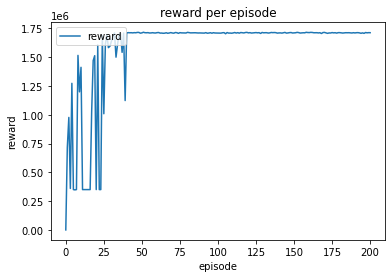

In [ ]:
plt.plot(plot1['reward'])
plt.title('reward per episode')
plt.ylabel('reward')
plt.xlabel('episode')
plt.legend(['reward'], loc='upper left')
plt.show()